In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [21]:
data.shape

(1470, 35)

In [22]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Checking for null values

In [25]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

checking for columns which has 0 values

In [32]:
for column_name in data.columns:
    column = data[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Age  is :  0
Count of zeros in column  Attrition  is :  0
Count of zeros in column  BusinessTravel  is :  0
Count of zeros in column  DailyRate  is :  0
Count of zeros in column  Department  is :  0
Count of zeros in column  DistanceFromHome  is :  0
Count of zeros in column  Education  is :  0
Count of zeros in column  EducationField  is :  0
Count of zeros in column  EmployeeCount  is :  0
Count of zeros in column  EmployeeNumber  is :  0
Count of zeros in column  EnvironmentSatisfaction  is :  0
Count of zeros in column  Gender  is :  0
Count of zeros in column  HourlyRate  is :  0
Count of zeros in column  JobInvolvement  is :  0
Count of zeros in column  JobLevel  is :  0
Count of zeros in column  JobRole  is :  0
Count of zeros in column  JobSatisfaction  is :  0
Count of zeros in column  MaritalStatus  is :  0
Count of zeros in column  MonthlyIncome  is :  0
Count of zeros in column  MonthlyRate  is :  0
Count of zeros in column  NumCompaniesWorked  is 

In [35]:
pd.DataFrame(data[['NumCompaniesWorked','StockOptionLevel','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']])

,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,8,0,8,6,4,0,5
1,1,1,10,10,7,1,7
2,6,0,7,0,0,0,0
3,1,0,8,8,7,3,0
4,9,1,6,2,2,2,2
...,...,...,...,...,...,...,...
1465,4,1,17,5,2,0,3
1466,4,1,9,7,7,1,7
1467,1,1,6,6,2,0,3
1468,2,0,17,9,6,0,8


In [68]:
data['TrainingTimesLastYear']=data['TrainingTimesLastYear'].replace(0,data['TrainingTimesLastYear'].mode()[0])

The columns which has 0 values can be a possible output so we are not replacing the 0 values

#### Checking datatypes of each column

In [6]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Seperate DataFrame for the categorical columns

In [54]:
df_categorical=pd.DataFrame(data[['BusinessTravel','Attrition','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime','StockOptionLevel']])
df_categorical

,BusinessTravel,Attrition,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,StockOptionLevel
0,Travel_Rarely,Yes,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,0
1,Travel_Frequently,No,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,1
2,Travel_Rarely,Yes,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,0
3,Travel_Frequently,No,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,0
4,Travel_Rarely,No,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,1
...,...,...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,No,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,1
1466,Travel_Rarely,No,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No,1
1467,Travel_Rarely,No,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes,1
1468,Travel_Frequently,No,Sales,Medical,Male,Sales Executive,Married,Y,No,0


#### Checking unique classes in each categorical column

In [12]:
data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [13]:
data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [14]:
data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [15]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [16]:
data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [17]:
data['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [18]:
data['Over18'].unique()

array(['Y'], dtype=object)

In [37]:
data['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

### Visualization of the Categorical columns

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


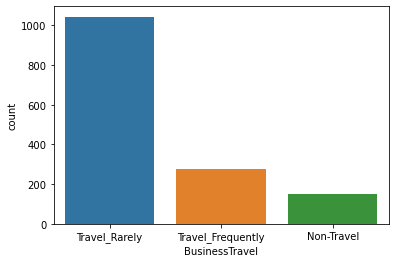

In [39]:
ax=sns.countplot(x='BusinessTravel',data=df_categorical)
print(df_categorical['BusinessTravel'].value_counts())

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


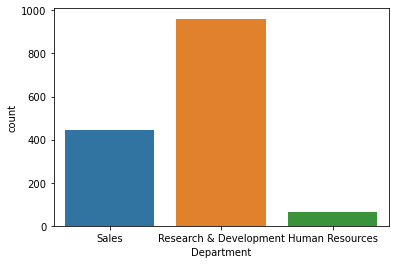

In [40]:
ax=sns.countplot(x='Department',data=df_categorical)
print(df_categorical['Department'].value_counts())

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


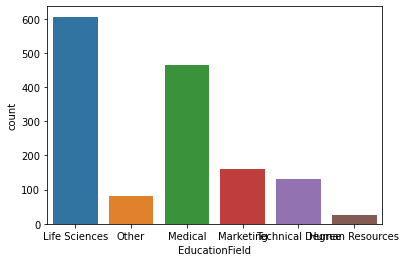

In [41]:
ax=sns.countplot(x='EducationField',data=df_categorical)
print(df_categorical['EducationField'].value_counts())

Male      882
Female    588
Name: Gender, dtype: int64


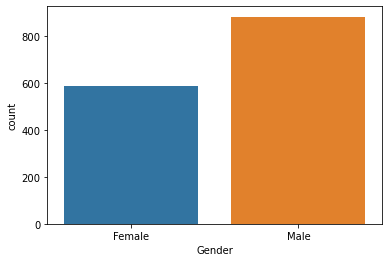

In [42]:
ax=sns.countplot(x='Gender',data=df_categorical)
print(df_categorical['Gender'].value_counts())

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


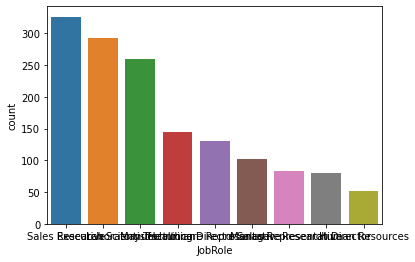

In [45]:
ax=sns.countplot(x='JobRole',data=df_categorical)
print(df_categorical['JobRole'].value_counts())

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


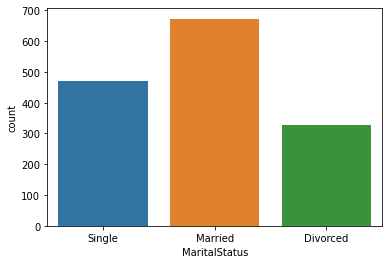

In [46]:
ax=sns.countplot(x='MaritalStatus',data=df_categorical)
print(df_categorical['MaritalStatus'].value_counts())

Y    1470
Name: Over18, dtype: int64


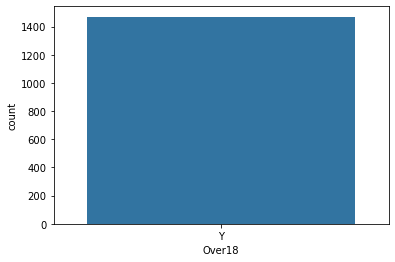

In [47]:
ax=sns.countplot(x='Over18',data=df_categorical)
print(df_categorical['Over18'].value_counts())

No     1054
Yes     416
Name: OverTime, dtype: int64


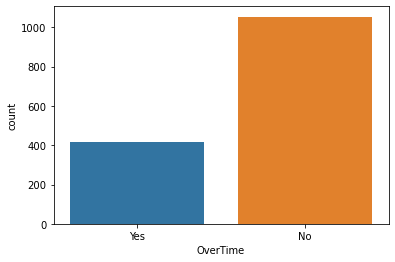

In [48]:
ax=sns.countplot(x='OverTime',data=df_categorical)
print(df_categorical['OverTime'].value_counts())

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64


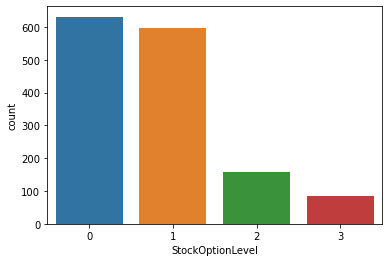

In [49]:
ax=sns.countplot(x='StockOptionLevel',data=df_categorical)
print(df_categorical['StockOptionLevel'].value_counts())

No     1233
Yes     237
Name: Attrition, dtype: int64


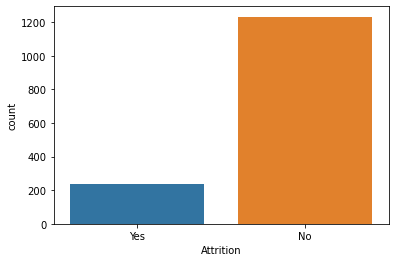

In [56]:
ax=sns.countplot(x='Attrition',data=df_categorical)
print(df_categorical['Attrition'].value_counts())

#### Checking the Distribution of the Continuous data

In [55]:
df_continuous=data.drop(columns=['BusinessTravel','Attrition','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime','StockOptionLevel'])
df_continuous

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,3,1,80,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,4,80,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,3,2,80,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,3,80,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,3,4,80,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,3,80,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,3,1,80,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,4,2,80,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,3,4,80,17,3,2,9,6,0,8


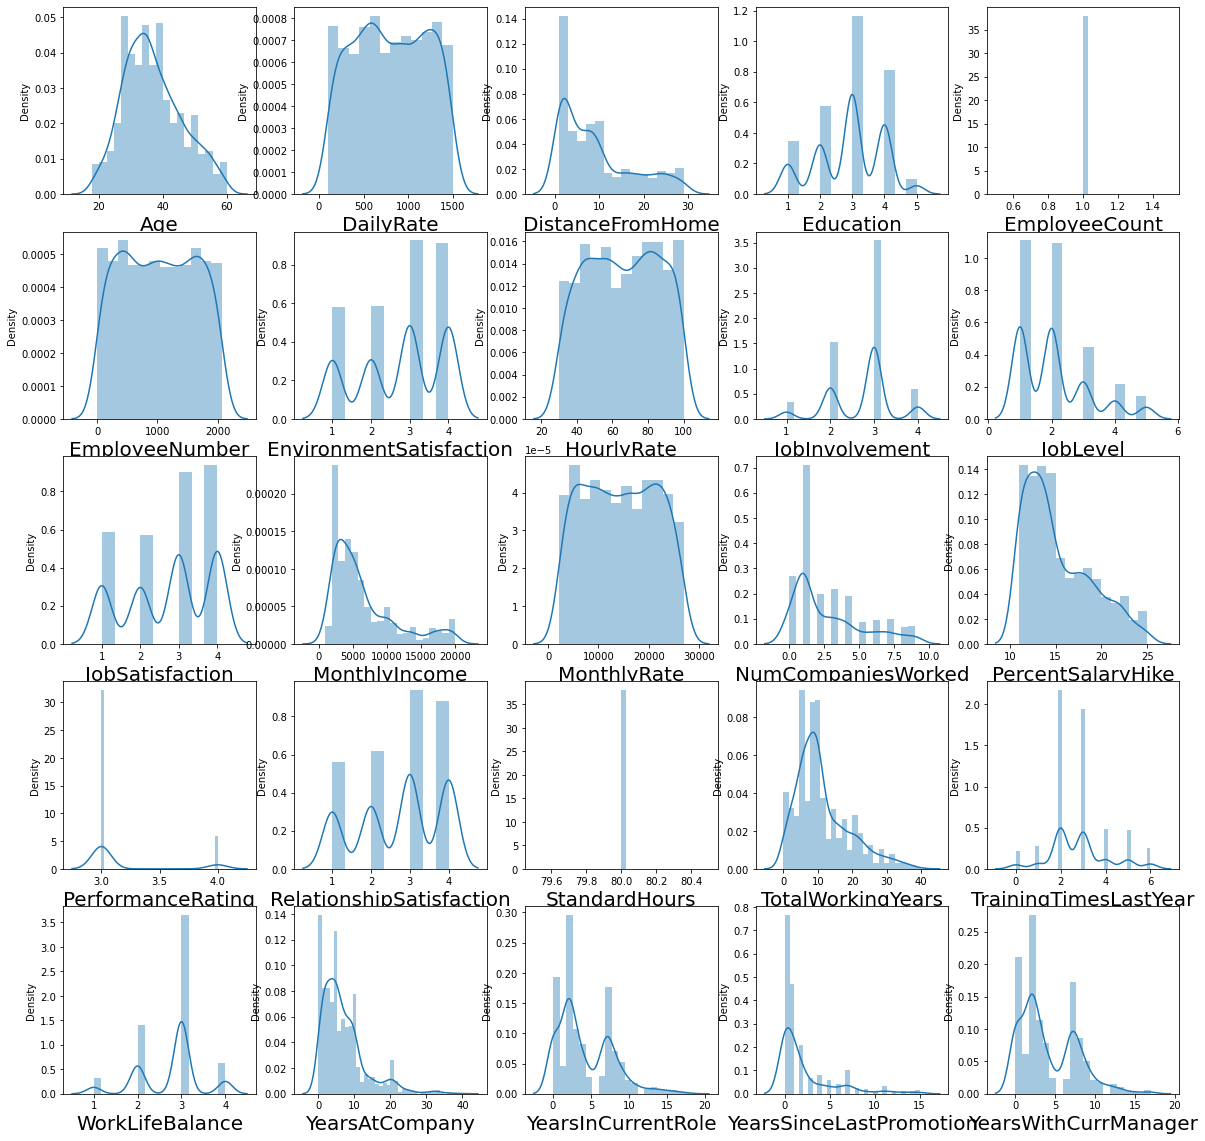

In [57]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df_continuous:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df_continuous[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Encoding of the Dataset

In [59]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [60]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [61]:
data.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

### Checking the correlation

In [64]:
data.corr()['Attrition']

Age                        -0.159205
Attrition                   1.000000
BusinessTravel              0.000074
DailyRate                  -0.056652
Department                  0.063991
DistanceFromHome            0.077924
Education                  -0.031373
EducationField              0.026846
EmployeeCount                    NaN
EmployeeNumber             -0.010577
EnvironmentSatisfaction    -0.103369
Gender                      0.029453
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobRole                     0.067151
JobSatisfaction            -0.103481
MaritalStatus               0.162070
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
Over18                           NaN
OverTime                    0.246118
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StandardHours                    NaN
S

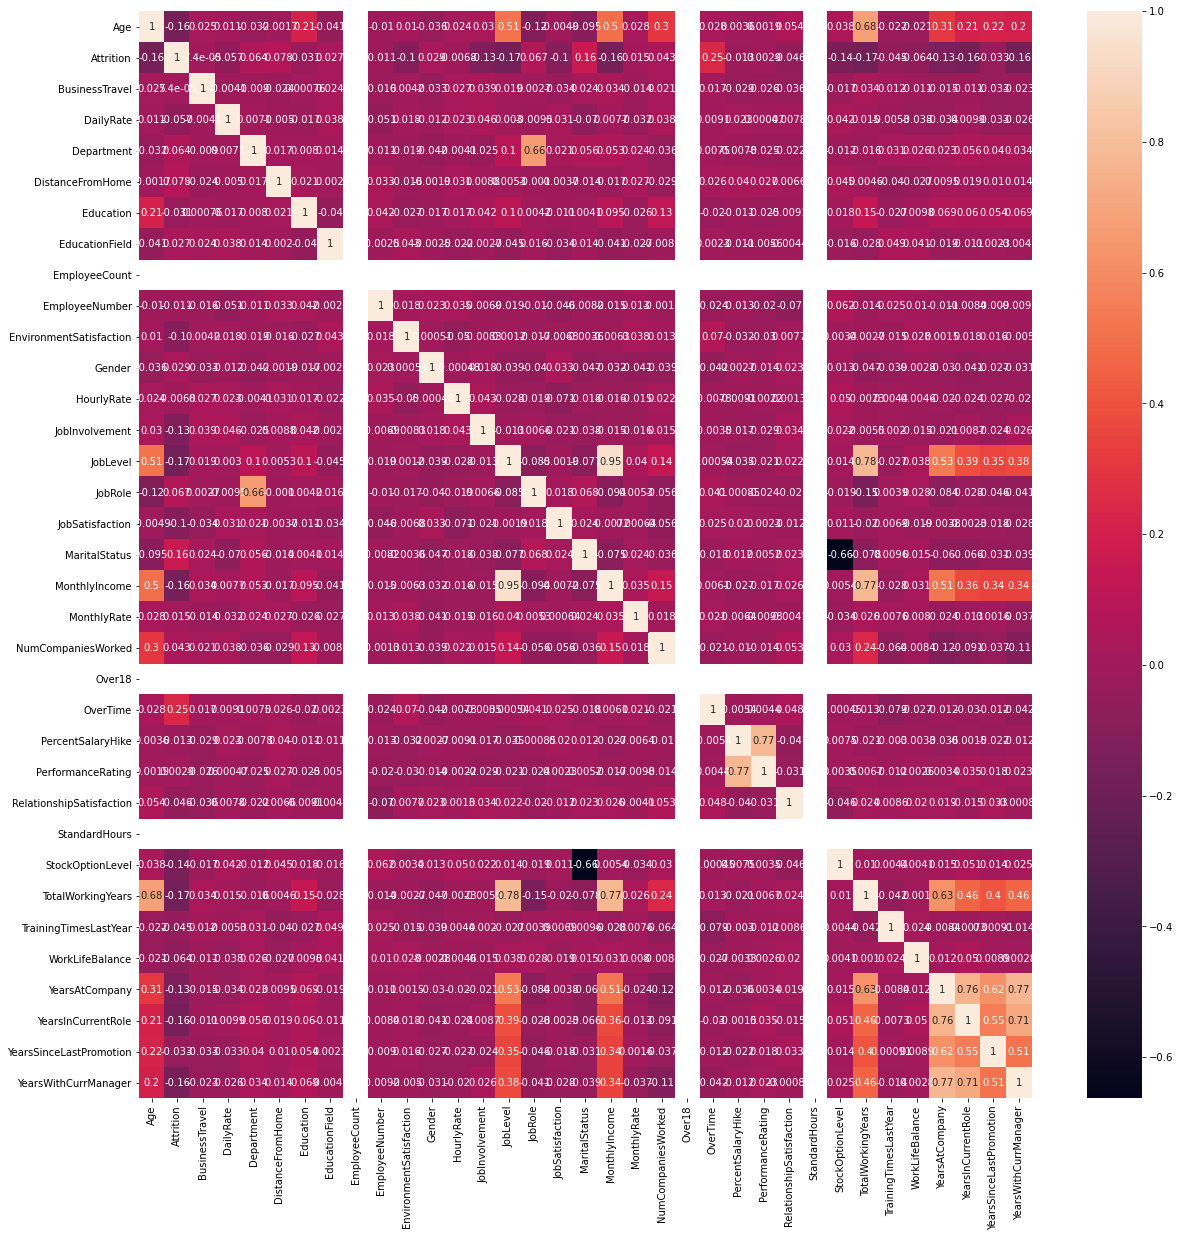

In [72]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

There are columns which has very less or no relation with the target variable i.e (BusinessTravel,EmployeeCount ,Over18,StandardHours,EducationField,Education,EmployeeNumber,Gender,HourlyRate,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,YearsSinceLastPromotion) so we can remove them from our dataset

In [69]:
data_new=data.drop(columns=['BusinessTravel','EmployeeCount','Over18','StandardHours','EducationField','Education','EmployeeNumber','Gender','HourlyRate','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','YearsSinceLastPromotion'])

In [70]:
data_new

,Age,Attrition,DailyRate,Department,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,1102,2,1,2,3,2,7,4,2,5993,1,0,8,2,1,6,4,5
1,49,0,279,1,8,3,2,2,6,2,1,5130,0,1,10,3,3,10,7,7
2,37,1,1373,1,2,4,2,1,2,3,2,2090,1,0,7,3,3,0,0,0
3,33,0,1392,1,3,4,3,1,6,3,1,2909,1,0,8,3,3,8,7,0
4,27,0,591,1,2,1,3,1,2,2,1,3468,0,1,6,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,1,23,3,4,2,2,4,1,2571,0,1,17,3,3,5,2,3
1466,39,0,613,1,6,4,2,3,0,1,1,9991,0,1,9,5,3,7,7,7
1467,27,0,155,1,4,2,4,2,4,2,1,6142,1,1,6,2,3,6,2,3
1468,49,0,1023,2,2,4,2,2,7,2,1,5390,0,0,17,3,2,9,6,8


### Checking for outliers using boxplot

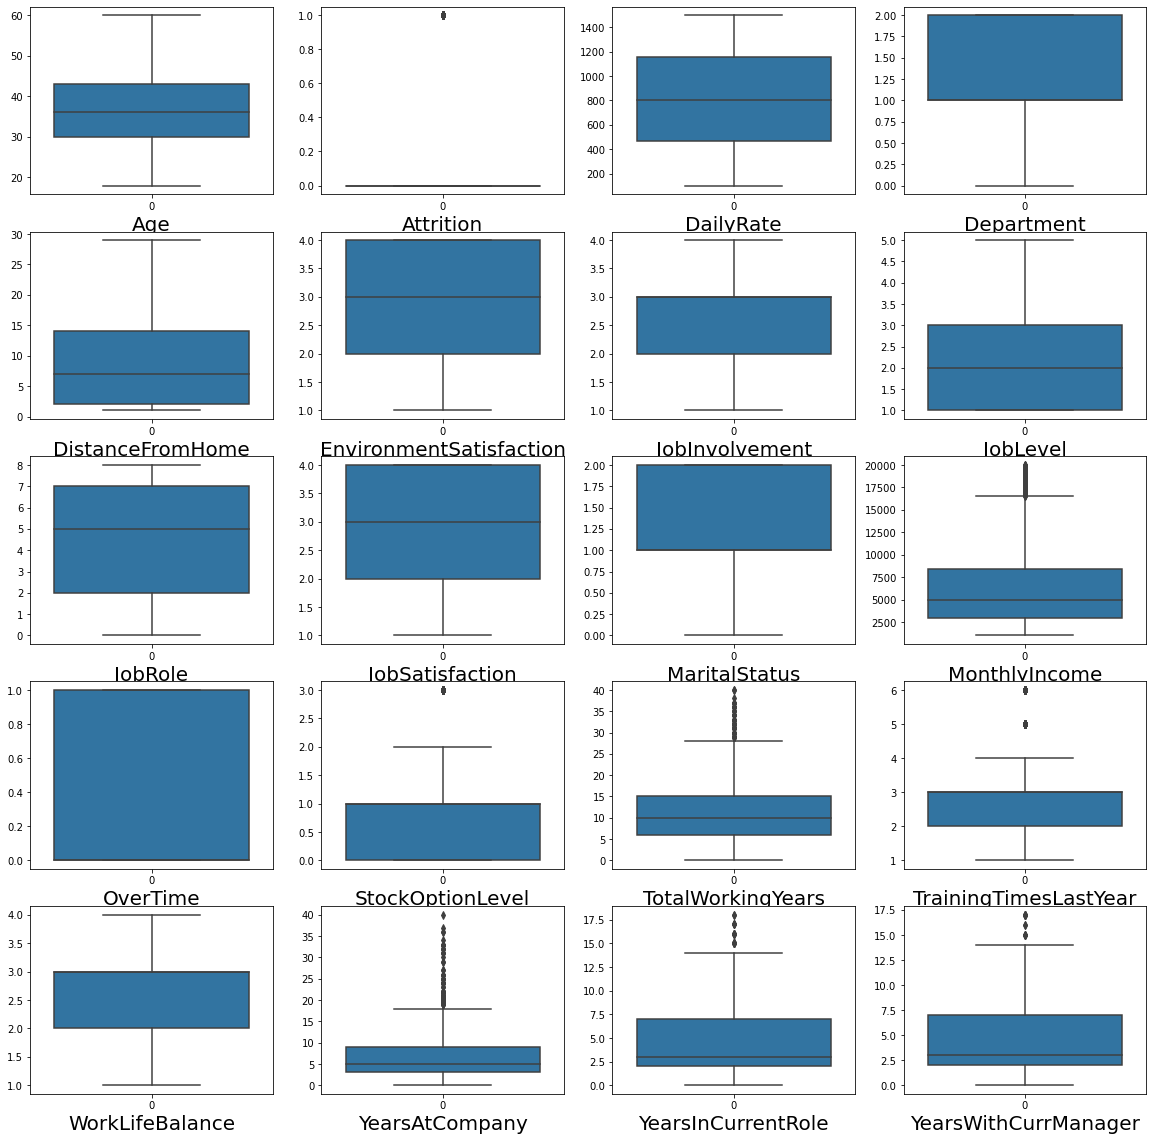

In [71]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in data_new:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data=data_new[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Removing outliers using z-score technique

In [74]:
from scipy.stats import zscore
z=np.abs(zscore(data_new))
z.shape

(1470, 20)

In [83]:
print(np.where(z>3))   # setting threshold=3

(array([  28,   62,   63,   85,   98,   98,  123,  123,  126,  126,  153,
        187,  187,  190,  190,  231,  231,  237,  270,  270,  281,  386,
        401,  411,  425,  445,  466,  473,  477,  561,  561,  592,  595,
        595,  616,  624,  635,  653,  677,  686,  716,  746,  749,  861,
        875,  894,  914,  918,  926,  956,  962,  976, 1024, 1043, 1078,
       1086, 1111, 1116, 1116, 1135, 1138, 1184, 1301, 1327, 1348, 1351,
       1401, 1430], dtype=int64), array([19, 17, 18, 14, 14, 17, 18, 19, 14, 17, 19, 14, 19, 17, 18, 18, 19,
       17, 14, 17, 18, 19, 14, 17, 17, 14, 18, 17, 17, 17, 19, 17, 14, 17,
       19, 14, 19, 17, 17, 19, 18, 18, 17, 17, 19, 14, 17, 17, 19, 14, 17,
       18, 18, 14, 19, 17, 17, 14, 17, 17, 17, 14, 14, 18, 19, 18, 14, 18],
      dtype=int64))


In [84]:
data_z=data_new[(z<3).all(axis=1)]

In [85]:
data_z.shape

(1412, 20)

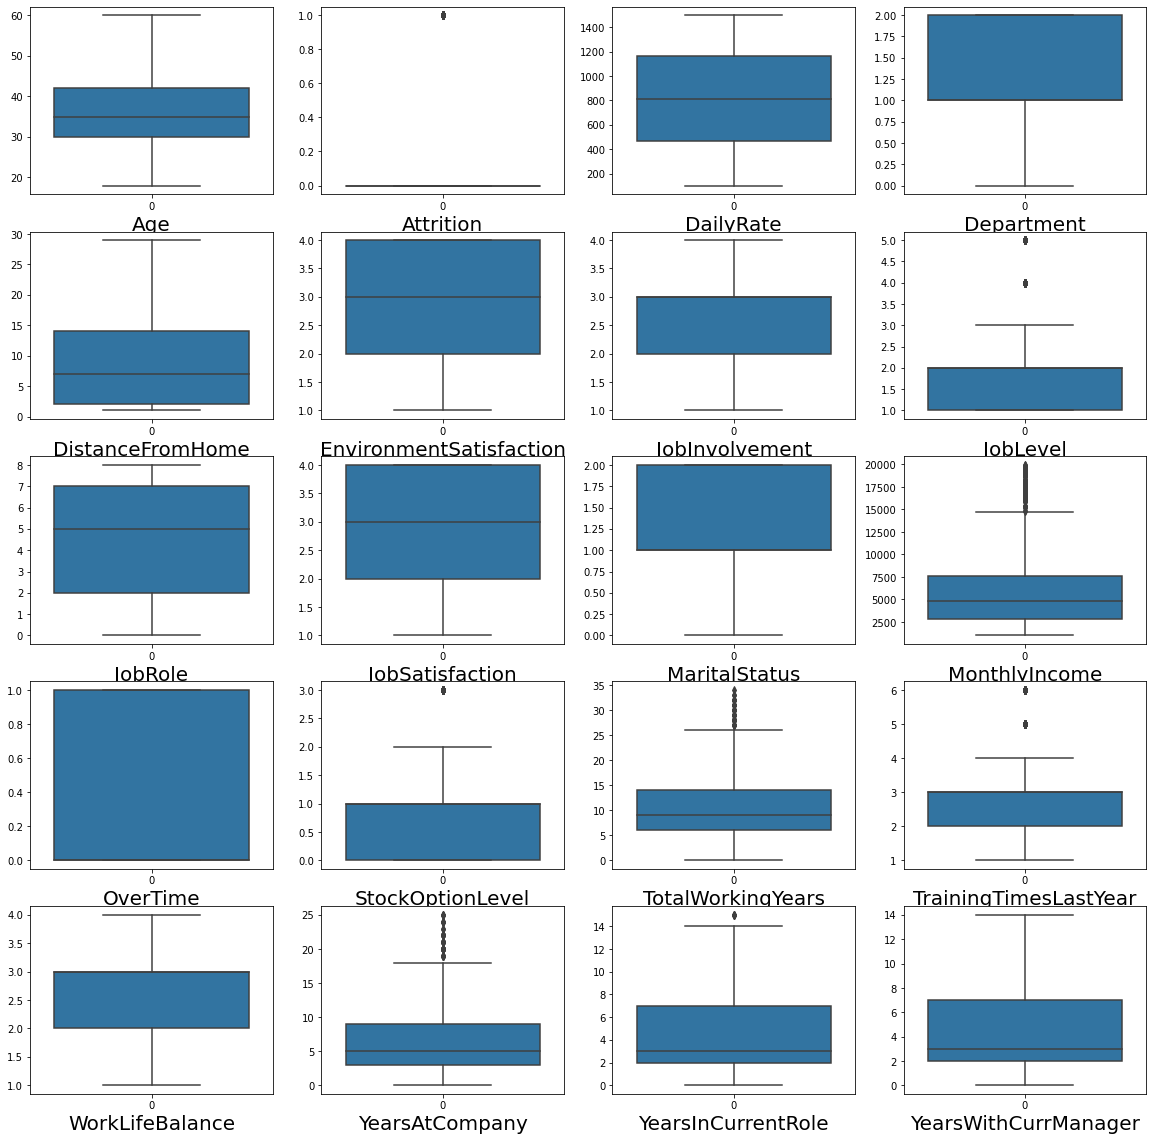

In [86]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in data_z:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data=data_z[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Now These outliers are possible so we are not removing data any further

### Dividing the Dataset into dependent and independent variable

In [87]:
x=data_z.drop(columns='Attrition')
y=data_z['Attrition']

In [88]:
x

,Age,DailyRate,Department,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1102,2,1,2,3,2,7,4,2,5993,1,0,8,2,1,6,4,5
1,49,279,1,8,3,2,2,6,2,1,5130,0,1,10,3,3,10,7,7
2,37,1373,1,2,4,2,1,2,3,2,2090,1,0,7,3,3,0,0,0
3,33,1392,1,3,4,3,1,6,3,1,2909,1,0,8,3,3,8,7,0
4,27,591,1,2,1,3,1,2,2,1,3468,0,1,6,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,1,23,3,4,2,2,4,1,2571,0,1,17,3,3,5,2,3
1466,39,613,1,6,4,2,3,0,1,1,9991,0,1,9,5,3,7,7,7
1467,27,155,1,4,2,4,2,4,2,1,6142,1,1,6,2,3,6,2,3
1468,49,1023,2,2,4,2,2,7,2,1,5390,0,0,17,3,2,9,6,8


In [89]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1412, dtype: int32

### Checking Skewness

In [91]:
x.skew().sort_values()

WorkLifeBalance           -0.551079
JobInvolvement            -0.492319
JobRole                   -0.379654
JobSatisfaction           -0.341911
EnvironmentSatisfaction   -0.327542
MaritalStatus             -0.156517
DailyRate                 -0.020661
Department                 0.183220
Age                        0.449721
YearsWithCurrManager       0.688839
YearsInCurrentRole         0.767746
DistanceFromHome           0.959593
StockOptionLevel           0.962487
OverTime                   0.962926
TotalWorkingYears          0.980264
TrainingTimesLastYear      1.016652
JobLevel                   1.098427
YearsAtCompany             1.292889
MonthlyIncome              1.494853
dtype: float64

### Transform data to remove skewness

In [93]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

### Scaling the data

In [94]:
sc=StandardScaler()
x_new=sc.fit_transform(x_new)
x_new

array([[ 0.59111651,  0.74661102,  1.37909249, ...,  0.19884238,
         0.26067952,  0.55670592],
       [ 1.35790021, -1.35006026, -0.47410521, ...,  0.88553646,
         0.96441072,  0.99170345],
       [ 0.16250637,  1.33546675, -0.47410521, ..., -2.17147157,
        -1.5791246 , -1.53543943],
       ...,
       [-1.09516358, -1.75994966, -0.47410521, ...,  0.19884238,
        -0.4106152 , -0.00429267],
       [ 1.35790021,  0.56866755,  1.37909249, ...,  0.73582031,
         0.75544025,  1.17928539],
       [-0.18352227, -0.37908697, -0.47410521, ..., -0.27563991,
        -0.04382182, -0.36834215]])

### Checking Multicolinearity using VIF(variance inflation factor)

In [95]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.877757,Age
1,1.016937,DailyRate
2,2.121559,Department
3,1.009466,DistanceFromHome
4,1.011771,EnvironmentSatisfaction
5,1.013018,JobInvolvement
6,2.322513,JobLevel
7,1.992986,JobRole
8,1.010077,JobSatisfaction
9,2.286404,MaritalStatus


All the VIF values are less than 5 and are very low.That means no multicollinearity.

### Finding the best random state

In [96]:
maxAccu=0 #maximum accuracy
maxRS=0  # best random state value for which max accuracy is achieved
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Max Accuracy is',maxAccu,'on Random State ',maxRS)

Max Accuracy is 0.9150141643059491 on Random State  931


### Splitting data Into Training and test data

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=931)

### Logistic Regression

In [98]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

91.5014164305949
[[291  18]
 [ 37   7]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       309
           1       0.28      0.16      0.20        44

    accuracy                           0.84       353
   macro avg       0.58      0.55      0.56       353
weighted avg       0.81      0.84      0.83       353



### Decision Tree Classifier

In [99]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred=DT.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  82.43626062322946
[[266  43]
 [ 19  25]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       309
           1       0.37      0.57      0.45        44

    accuracy                           0.82       353
   macro avg       0.65      0.71      0.67       353
weighted avg       0.86      0.82      0.84       353



### Random Forest Classifier

In [100]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  88.95184135977338
[[303   6]
 [ 33  11]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       309
           1       0.65      0.25      0.36        44

    accuracy                           0.89       353
   macro avg       0.77      0.62      0.65       353
weighted avg       0.87      0.89      0.87       353



### SVC

In [101]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  89.80169971671388
[[304   5]
 [ 31  13]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       309
           1       0.72      0.30      0.42        44

    accuracy                           0.90       353
   macro avg       0.81      0.64      0.68       353
weighted avg       0.88      0.90      0.88       353



Logistic Regression ,Random Forest and SVC are producing good accuracy. Now we will check for cross validation score as well for overfitting

### Cross Validation

In [102]:
from sklearn.model_selection import cross_val_score

In [103]:
cvs_LR=cross_val_score(LR,x_new,y,cv=5)
print("Cross Validation score for Logistic Regresiion is ",cvs_LR.mean())

Cross Validation score for Logistic Regresiion is  0.8647294689622335


In [104]:
cvs_DT=cross_val_score(DT,x_new,y,cv=5)
print("Cross validation score for Decision tree is ",cvs_DT.mean())

Cross validation score for Decision tree is  0.7832594040548329


In [105]:
cvs_RF=cross_val_score(RF,x_new,y,cv=5)
print("Cross validation score for Random Forest is ",cvs_RF.mean())

Cross validation score for Random Forest is  0.8534070120041101


In [106]:
cvs_SVC=cross_val_score(svc,x_new,y,cv=5)
print("Cross validation score for SVC is ",cvs_SVC.mean())

Cross validation score for SVC is  0.8548254517204221


Logistic Regression is Performing better among all so we will continue with Logistic Regression

### ROC AUC plot

<function matplotlib.pyplot.show(close=None, block=None)>

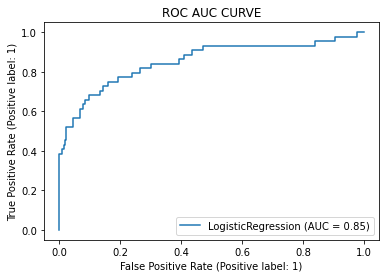

In [108]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(LR,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show

Since Logistic Regression is performing best and it is not capabile of hyperparameter tuning ,So we choose Logistic Regression as the final model

### Saving the model in pickel

In [109]:
import pickle
filename='Attrition_model.pickle'
pickle.dump(LR,open(filename,'wb'))

# Documentation

In [ ]:
Import the csv file then seen the data we found lost's of 0 values in the columns so we delt with that. In some columns 0 value can be the possible output so in that we had not replaced the 0 values
After that we made the seperate DataFrame of the categorical and the continuous data.
Then the vizualization of the categorical and continuous data is done and seen some skewness in the continuous data that was removed with the power transform function.
Then encoding is done with the help of label encoder.
Then correlation is checked with the target variable and the columns ['BusinessTravel','EmployeeCount','Over18','StandardHours','EducationField','Education','EmployeeNumber','Gender','HourlyRate','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','YearsSinceLastPromotion'] has been removed since they have very less relationship with the target variable.
Then we checked for outliers and remove the outliers using the zscore technique.
After scaling the data we checked for multicollinearity and no multicollinearity is found between columns.
After that we trained the model with several algorithms and found Logistic regression as the best algo for classification problem.
Hyperparameter tuning is not done since it is not applicable for Logistic regression.
In the last we saved the model.